# Importing the Necessary Libraries

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

# Data Exploration

In this stage, we will be doing the basic data exploration which is to read the data file, get the shape, get the data information and other details about the dataset.

In [3]:
df = pd.read_csv("Student Stress Factors.csv")
df.head()

,Timestamp,Kindly Rate your Sleep Quality 😴,How many times a week do you suffer headaches 🤕?,How would you rate you academic performance 👩‍🎓?,how would you rate your study load?,How many times a week you practice extracurricular activities 🎾?,How would you rate your stress levels?
0,27/10/2023 21:54:15,3,1,3,4,2,3
1,28/10/2023 12:24:40,4,1,2,3,3,2
2,28/10/2023 12:24:51,2,1,2,1,4,4
3,28/10/2023 12:26:11,3,2,3,2,3,3
4,28/10/2023 12:26:45,2,3,1,5,5,3


In [4]:
df.shape

(53, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 7 columns):
 #   Column                                                            Non-Null Count  Dtype 
---  ------                                                            --------------  ----- 
 0   Timestamp                                                         53 non-null     object
 1   Kindly Rate your Sleep Quality 😴                                  53 non-null     int64 
 2   How many times a week do you suffer headaches 🤕?                  53 non-null     int64 
 3   How would you rate you academic performance 👩‍🎓?                  53 non-null     int64 
 4   how would you rate your study load?                               53 non-null     int64 
 5   How many times a week you practice extracurricular activities 🎾?  53 non-null     int64 
 6   How would you rate your stress levels?                            53 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 3.0+ KB


In [6]:
df.columns

Index(['Timestamp', 'Kindly Rate your Sleep Quality 😴',
       'How many times a week do you suffer headaches 🤕?',
       'How would you rate you academic performance 👩‍🎓?',
       'how would you rate your study load?',
       'How many times a week you practice extracurricular activities 🎾?',
       'How would you rate your stress levels?'],
      dtype='object')

#### Explanation of each Column in the Dataset

1. Kindly Rate your Sleep Quality: This column on a scale of 1-5 with **1 representing very bad and 5 representing Good**, it rates the students sleep quality.2. 'How many times a week do you suffer headache? This column on a scale of 1-5 with **1 representing more and 5 representing less**, takes count of the number of times the student suffers headaches.
3. How would you rate you academic performance 👩‍🎓? This column rates the student academic performance on a scale of 1-5 with **1 being bad and 5 being Great.**
4. how would you rate your study load? This column rates the student study load on the scale of 1-5 with **1 being heavy and 5 as light**
5. How many times a week you practice extracurricular activities 🎾? This week measures a student weekly extracurricular activities with **1 being rarely and 5 being daily.**
6. How would you rate your stress levels? This column measures the stress level of the student with **1 being very high and 5 being very low.** vels?

# Data Preprocessing

This stage consists of renaming the columns, removing unnecessary columns, taking care of missing values if any, performing feature engineering and ensuring uniform data formatting to prepare it for accurate model training and prediction.

In [7]:
new_column_name = {
    "Kindly Rate your Sleep Quality 😴": "sleep quality",
    "How many times a week do you suffer headaches 🤕?": "headaches_per_week",
    "How would you rate you academic performance 👩‍🎓?": "rate_of_academic_performance",
    "how would you rate your study load?": "rate_of_study_load",
    "How many times a week you practice extracurricular activities 🎾?": "weekly_extracurricular_activities",
    "How would you rate your stress levels?": "rate_of_stress_levels"
    
} #dictionary to map old names with new names

# Rename columns using the dictionary
df.rename(columns = new_column_name, inplace = True)

# Print the DataFrame with updated column names
df.head()

,Timestamp,sleep quality,headaches_per_week,rate_of_academic_performance,rate_of_study_load,weekly_extracurricular_activities,rate_of_stress_levels
0,27/10/2023 21:54:15,3,1,3,4,2,3
1,28/10/2023 12:24:40,4,1,2,3,3,2
2,28/10/2023 12:24:51,2,1,2,1,4,4
3,28/10/2023 12:26:11,3,2,3,2,3,3
4,28/10/2023 12:26:45,2,3,1,5,5,3


In [8]:
#dropping unnecessary columns
df.drop(columns = "Timestamp", inplace = True)

#print df after dropping column
df.head()

,sleep quality,headaches_per_week,rate_of_academic_performance,rate_of_study_load,weekly_extracurricular_activities,rate_of_stress_levels
0,3,1,3,4,2,3
1,4,1,2,3,3,2
2,2,1,2,1,4,4
3,3,2,3,2,3,3
4,2,3,1,5,5,3


# Data Visualization

In this stage, we perform data visualization with the necessary libraries to explore trends and patterns in the dataset. 

#### Univariate Analysis

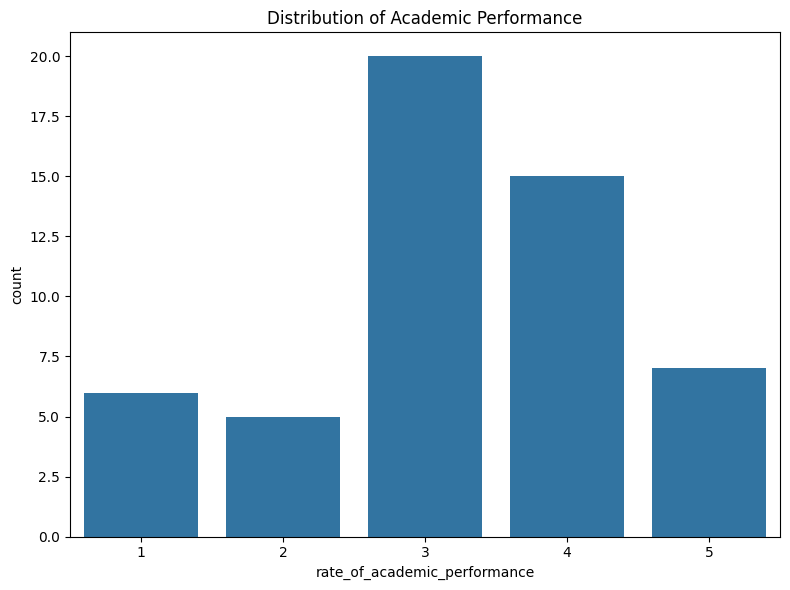

In [10]:
plt.figure(figsize = (8,6))
sns.countplot(df, x = "rate_of_academic_performance")
plt.title("Distribution of Academic Performance")
plt.tight_layout()

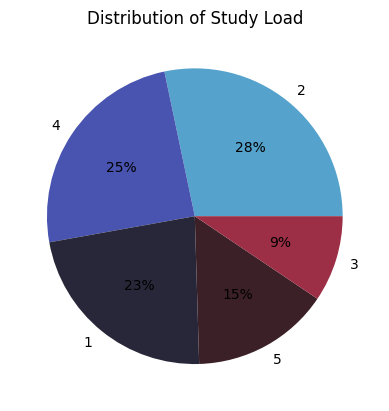

In [14]:
dict_study = dict(df["rate_of_study_load"].value_counts())
palette = sns.color_palette("icefire")
plt.pie(dict_study.values(), labels = dict_study.keys(), autopct = "%.0f%%", colors=palette)
plt.title("Distribution of Study Load")
plt.show()

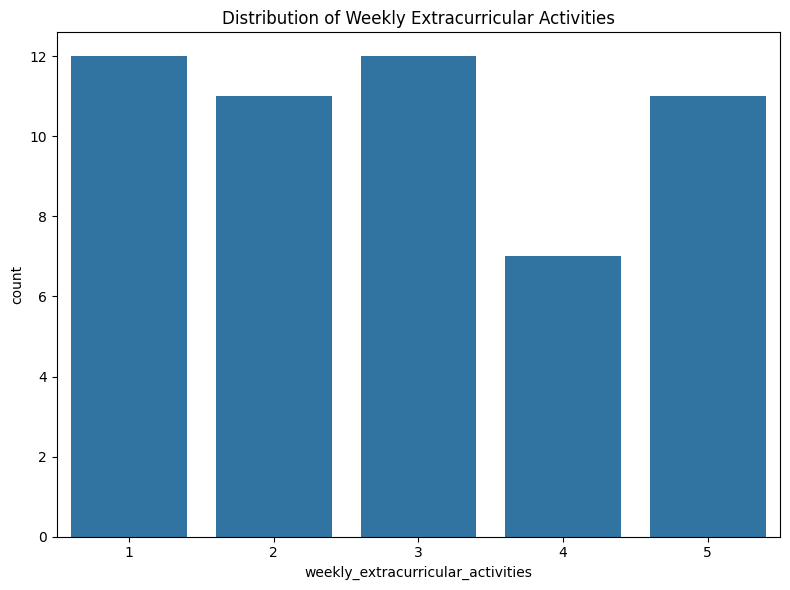

In [18]:
plt.figure(figsize = (8,6))
sns.countplot(df, x="weekly_extracurricular_activities")
plt.title("Distribution of Weekly Extracurricular Activities")
plt.tight_layout();

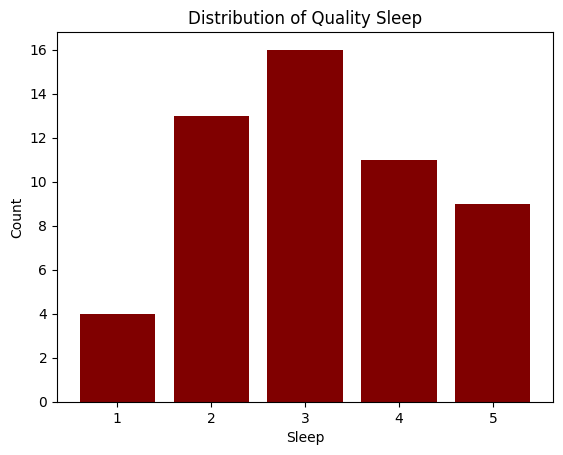

In [29]:
sleep = dict(df["sleep quality"].value_counts())
slp = list(sleep.keys())
cct = list(sleep.values())
plt.bar(slp, cct, color ='maroon')
plt.xlabel("Sleep")
plt.ylabel("Count")
plt.title("Distribution of Quality Sleep")
plt.show();